<a href="https://colab.research.google.com/github/newstage75/python_data_analysis_100knock/blob/main/%E7%AC%AC5%E7%AB%A0/%E3%80%90%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%80%91%E9%A1%A7%E5%AE%A2%E3%81%AE%E9%80%80%E4%BC%9A%E3%82%92%E4%BA%88%E6%B8%AC%E3%81%99%E3%82%8B10%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# 作業フォルダへの移動を行います。
# 人によって作業場所が異なるので、その場合作業場所を変更してください。（ここでは、第４章のデータを引き続き使用）
import os
os.chdir('/content/drive/MyDrive/データサイエンス/20240505python実践データ分析100本ノック/実習用Myフォルダ/第４章')

In [45]:
import pandas as pd
customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('uselog_months.csv')

In [46]:
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [47]:
year_months = list(uselog_months["年月"].unique())
year_months

[201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903]

In [48]:
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
  tmp = uselog_months.loc[uselog_months["年月"]==year_months[i]].copy()
  tmp.rename(columns={"count":"count_0"}, inplace=True)
  tmp_before = uselog_months.loc[uselog_months["年月"]==year_months[i-1]].copy()
  del tmp_before["年月"]
  tmp_before.rename(columns={"count":"count_1"}, inplace=True)
  tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
  uselog = pd.concat([uselog,tmp], ignore_index=True)
uselog.head()


,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


上記のuselogでは当月と１ヶ月前の利用回数を集計している。

## ノック42:退会前月の退会顧客データを作成

退会の予測をする目的は"退会を未然に防ぐこと"なので、退会前月のデータから退会を予測する。

In [49]:
# 退会した顧客に絞り込んで、end_date列の1ヶ月前の年月を取得し、ノック41で整形したuselogとcustomer_id、年月をキーにして結合する。
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer["is_deleted"]==1]
exit_customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
708,TS511179,XXXXXX,C01,F,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,通常,3.0,3.0,3,3,0,2018-04-30,23
729,TS443736,XXXX,C02,M,2016-05-01,2018-04-30,CA1,1,デイタイム,7500,通常,3.0,3.0,3,3,0,2018-04-30,23
730,HD542886,XX,C01,M,2016-05-01,2018-04-30,CA1,1,オールタイム,10500,通常,1.0,1.0,1,1,0,2018-04-30,23
770,HD597545,XXXXX,C03,F,2016-06-01,2018-05-31,CA1,1,ナイト,6000,通常,3.5,3.5,4,3,1,2018-05-31,23
785,HI749296,XXXXX,C01,M,2016-06-01,2018-05-31,CA1,1,オールタイム,10500,通常,3.0,3.0,3,3,0,2018-05-31,23


In [50]:
exit_customer["exit_date"] = None
exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"]) #date_time型に変換

<ipython-input-50-9558bac5c90f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["exit_date"] = None
<ipython-input-50-9558bac5c90f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"]) #date_time型に変換


In [51]:
for i in exit_customer.index:
  exit_customer.loc[i, "exit_date"] = exit_customer.loc[i, "end_date"] - relativedelta(months=1)
exit_customer["exit_date"] = pd.to_datetime(exit_customer["exit_date"])
exit_customer["年月"] = exit_customer["exit_date"].dt.strftime("%Y%m")
uselog["年月"] = uselog["年月"].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "年月"], how="left")
print(len(uselog))
exit_uselog.head()

33851


<ipython-input-51-4d90da0d462d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["exit_date"] = pd.to_datetime(exit_customer["exit_date"])
<ipython-input-51-4d90da0d462d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["年月"] = exit_customer["exit_date"].dt.strftime("%Y%m")


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


上記では、新たにexit_dateという列を作成し、end_dateの一ヶ月前を計算している。そこで得た日付を年月に変換し、uselogをベースにして、結合している。

データ件数はuselogをベースにしているので、33851件存在する。結合したデータは退会した顧客の退会前月のデータのみなので、欠損地が多く発生

In [52]:
# 結合してデータが欠損しえちないものだけを残して、あとは除外
exit_uselog = exit_uselog.dropna(subset=["name"])
print(len(exit_uselog))
print(len(exit_uselog["customer_id"].unique()))
exit_uselog.head()

1104
1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30


In [53]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [54]:
uselog.head()

,年月,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [55]:
# 続いて継続顧客のデータを作成する。
conti_customer = customer.loc[customer["is_deleted"]==0]
conti_uselog = pd.merge(uselog, conti_customer, on=["customer_id"], how="left")

In [56]:
conti_uselog.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,201805,AS002855,5,4.0,XXXX,C03,F,2016-11-01,NaN,CA1,...,ナイト,6000.0,通常,4.500000,5.0,7.0,2.0,1.0,2019-04-30,29.0
1,201805,AS009373,4,3.0,XX,C01,F,2015-11-01,NaN,CA1,...,オールタイム,10500.0,通常,5.083333,5.0,7.0,3.0,1.0,2019-04-30,41.0
2,201805,AS015233,7,NaN,XXXXX,C01,M,2018-05-13,NaN,CA2,...,オールタイム,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
3,201805,AS015315,3,6.0,XXXXX,C01,M,2015-07-01,NaN,CA1,...,オールタイム,10500.0,通常,4.833333,5.0,7.0,3.0,1.0,2019-04-30,45.0
4,201805,AS015739,5,7.0,XXXXX,C03,M,2017-06-01,NaN,CA1,...,ナイト,6000.0,通常,5.583333,5.5,8.0,4.0,1.0,2019-04-30,22.0


In [57]:
# uselogには退会済みの履歴もあるのでは？と思い確認
conti_uselog[conti_uselog["is_deleted"].isnull()].head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
5,201805,AS015746,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,201805,AS025956,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,201805,AS029624,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,201805,AS030404,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,201805,AS047907,4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
len(conti_uselog[conti_uselog["is_deleted"].isnull()])

6429

In [59]:
# 全体の件数確認
len(conti_uselog)

33851

In [60]:
# nameが空（つまりは退会済みのユーザーのログ）を削除
conti_uselog = conti_uselog.dropna(subset=["name"])
print(len(conti_uselog))

27422


In [61]:
# 検証。差分が6429になるか確認
print(33851 - 27422)

6429


In [62]:
# 上記のconti_uselogでは、継続顧客１人が複数の利用ログが含まれるので不公平になってしまう。
# 退会ユーザーのデータ（exit_uselog）が1104件しかないので、27422件のデータ全てを継続顧客のデータにする場合は、
# 不均衡なデータになってしまう。
# まずは簡単に、継続顧客も顧客あたり１件になるようにアンダーサンプリングする。（データをシャッフルして重複を削除）
conti_uselog = conti_uselog.sample(frac=1, random_state=0).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset="customer_id")
print(len(conti_uselog))
conti_uselog.head()

2842


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,class_name,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaN,CA2,...,オールタイム,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaN,CA1,...,オールタイム,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaN,CA1,...,オールタイム,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaN,CA1,...,ナイト,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaN,CA1,...,オールタイム,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0


In [63]:
# 再掲（退会ユーザのデータ）
print(len(exit_uselog))
exit_uselog.head()

1104


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,2018-05-30
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,10500.0,通常,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,2018-05-30
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,2018-05-30
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,10500.0,通常,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,2018-05-30
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,6000.0,通常,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,2018-05-30


In [64]:
# 継続顧客のデータと退会顧客のデータを縦に結合する。
predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)
print(len(predict_data))
predict_data.head()

3946


<ipython-input-64-1d2904826a62>:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predict_data = pd.concat([conti_uselog, exit_uselog], ignore_index=True)


,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flag,calc_date,membership_period,exit_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,10500.0,入会費半額,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,10500.0,通常,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,10500.0,通常,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6000.0,通常,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,10500.0,通常,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT


### ノック44：予測する月の在籍期間を作成しよう
- 時間的な要素が入ったデータなので、在籍期間などのデータを変数として用いるのが良いアプローチ

In [65]:
# データフレームのカラム名を表示
print(predict_data.columns)

Index(['年月', 'customer_id', 'count_0', 'count_1', 'name', 'class', 'gender',
       'start_date', 'end_date', 'campaign_id', 'is_deleted', 'class_name',
       'price', 'campaign_name', 'mean', 'median', 'max', 'min',
       'routine_flag', 'calc_date', 'membership_period', 'exit_date'],
      dtype='object')


In [66]:
# 在籍期間のカラム"priod"を追加
predict_data["period"] = 0
predict_data["now_date"] = pd.to_datetime(predict_data["年月"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
for i in range(len(predict_data)):
  delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
  predict_data.loc[i, "period"] = int(delta.years*12 + delta.months)
predict_data.head()

,年月,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,mean,median,max,min,routine_flag,calc_date,membership_period,exit_date,period,now_date
0,201806,AS015233,7,7.0,XXXXX,C01,M,2018-05-13,NaT,CA2,...,7.545455,7.0,11.0,4.0,1.0,2019-04-30,11.0,NaT,0,2018-06-01
1,201812,AS046594,7,5.0,XXX,C01,M,2018-03-01,NaT,CA1,...,7.166667,7.0,10.0,5.0,1.0,2019-04-30,13.0,NaT,9,2018-12-01
2,201808,OA769163,6,4.0,XXX,C01,M,2017-05-01,NaT,CA1,...,6.083333,6.0,8.0,2.0,1.0,2019-04-30,23.0,NaT,15,2018-08-01
3,201805,AS981537,10,6.0,XX,C03,M,2018-02-01,NaT,CA1,...,6.916667,7.0,10.0,5.0,1.0,2019-04-30,14.0,NaT,3,2018-05-01
4,201805,GD065188,6,7.0,XX,C01,M,2017-09-01,NaT,CA1,...,6.333333,6.5,9.0,3.0,1.0,2019-04-30,19.0,NaT,8,2018-05-01


In [67]:
# 実験
print(pd.to_datetime("2018-05-13"))
print(pd.to_datetime("2018-06-01"))
test_delta = relativedelta(pd.to_datetime("2018-06-01"), pd.to_datetime("2018-05-13"))
print(test_delta)
print(int(test_delta.years*12 + test_delta.months))

2018-05-13 00:00:00
2018-06-01 00:00:00
relativedelta(days=+19)
0


### ノック45：欠損値の除去

In [68]:
# 機械学習は欠損があると対応できないため、欠損がふくまれるデータの除去を行う
predict_data.isna().sum()

,0
年月,0
customer_id,0
count_0,0
count_1,255
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0


In [69]:
#（再掲）count_0〜count_5は当月、１ヶ月、２ヶ月と過去６ヶ月のデータが格納されている。
# ということは、count_1が欠損ということは、その月に入会した人か？
# 同じ255件ヒットしたので予想は当たり！
predict_data[predict_data["period"]==0].isna().sum()

,0
年月,0
customer_id,0
count_0,0
count_1,255
name,0
class,0
gender,0
start_date,0
end_date,347
campaign_id,0


In [70]:
# count_1が欠損しているデータを除去する。
predict_data = predict_data.dropna(subset=["count_1"])
predict_data.isna().sum()

,0
年月,0
customer_id,0
count_0,0
count_1,0
name,0
class,0
gender,0
start_date,0
end_date,2639
campaign_id,0


### ノック46:文字列型の変数を処理できるように整形する
- 機械学習を行う際に入会キャンペーン区分、会員区分、性別などの文字データはどうすればいいか？
- 性別などのカテゴリー関連のデータを「カテゴリカル変数」と呼ぶ。これはフラグ化（ダミー変数化）する。

In [72]:
# 変数のしぼりこみ
target_col = ["campaign_name", "class_name", "gender", "count_1", "routine_flag", "period", "is_deleted"]
predict_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flag,period,is_deleted
0,入会費半額,オールタイム,M,7.0,1.0,0,0.0
1,通常,オールタイム,M,5.0,1.0,9,0.0
2,通常,オールタイム,M,4.0,1.0,15,0.0
3,通常,ナイト,M,6.0,1.0,3,0.0
4,通常,オールタイム,M,7.0,1.0,8,0.0


In [73]:
# カテゴリかる変数を用いてダミー変数を作成
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flag,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,campaign_name_通常,class_name_オールタイム,class_name_デイタイム,class_name_ナイト,gender_F,gender_M
0,7.0,1.0,0,0.0,True,False,False,True,False,False,False,True
1,5.0,1.0,9,0.0,False,False,True,True,False,False,False,True
2,4.0,1.0,15,0.0,False,False,True,True,False,False,False,True
3,6.0,1.0,3,0.0,False,False,True,False,False,True,False,True
4,7.0,1.0,8,0.0,False,False,True,True,False,False,False,True


In [74]:
# それぞれ一つずつカテゴリ変数の列を削除（残ったものがFalseだったら、自動的にTrueなので）
del predict_data["campaign_name_通常"]
del predict_data["class_name_ナイト"]
del predict_data["gender_M"]
predict_data.head()

,count_1,routine_flag,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,7.0,1.0,0,0.0,True,False,True,False,False
1,5.0,1.0,9,0.0,False,False,True,False,False
2,4.0,1.0,15,0.0,False,False,True,False,False
3,6.0,1.0,3,0.0,False,False,False,False,False
4,7.0,1.0,8,0.0,False,False,True,False,False


「データ分析は、データ加工が８割」とよく言われるらしい

### ノック47:決定木を用いて退会予測モデルを作成
- 決定木（教師あり学習の分類アルゴリズム）

In [75]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

In [76]:
exit = predict_data.loc[predict_data["is_deleted"]==1]
conti = predict_data.loc[predict_data["is_deleted"]==0].sample(len(exit),random_state=0)

In [77]:
X = pd.concat([exit, conti], ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, random_state=0)

In [84]:
# 確認
print(len(X_train))
X_train.head()

1578


,count_1,routine_flag,period,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
1311,5.0,1.0,21,False,False,False,True,True
1301,10.0,1.0,5,False,False,False,True,True
326,5.0,0.0,1,True,False,False,False,True
1848,9.0,1.0,34,False,False,False,True,False
615,4.0,1.0,8,False,False,True,False,False


In [85]:
print(len(X_test))
X_test.head()

526


,count_1,routine_flag,period,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
1091,6.0,1.0,11,False,False,True,False,False
1786,6.0,1.0,14,False,False,True,False,False
1439,5.0,1.0,23,False,False,False,True,True
745,5.0,0.0,7,False,True,True,False,True
820,6.0,1.0,2,False,False,False,False,False


In [86]:
print(len(y_train))
y_train.head()

1578


,is_deleted
1311,0.0
1301,0.0
326,1.0
1848,0.0
615,1.0


In [87]:
print(len(y_test))
y_test.head()

526


,is_deleted
1091,0.0
1786,0.0
1439,0.0
745,1.0
820,1.0


In [88]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1.

In [89]:
results_test = pd.DataFrame({"y_test":y_test, "y_pred":y_test_pred})
results_test.head()

,y_test,y_pred
1091,0.0,1.0
1786,0.0,0.0
1439,0.0,0.0
745,1.0,1.0
820,1.0,0.0


### ノック48:予測モデルの評価を行い、モデルのチューニングをしてみる。

In [90]:
correct = len(results_test.loc[results_test["y_test"]==results_test["y_pred"]])
data_count = len(results_test)
score_test = correct / data_count
print(score_test)

0.8916349809885932


In [91]:
# 精度はscodeを使うと簡単に確認できる。
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8916349809885932
0.9759188846641318


In [92]:
# 上記を見ると、過学習の傾向がある。
# 決定木は深さを変えることもできる。
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9201520912547528
0.9252217997465145


### ノック49:モデルに寄与している変数を確認する。

In [93]:
importance = pd.DataFrame({"feature_names":X.columns, "coefficient":model.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.363986
1,routine_flag,0.136646
2,period,0.487865
3,campaign_name_入会費半額,0.000000
4,campaign_name_入会費無料,0.006751
5,class_name_オールタイム,0.004607
6,class_name_デイタイム,0.000146
7,gender_F,0.000000


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=f1c934e7e86c180f50fcd7ef7a9fcb53ba2f44a94c7fdfdd859b37455b962609
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


[Text(0.5643939393939394, 0.9166666666666666, 'period <= 11.5\ngini = 0.5\nsamples = 1578\nvalue = [792.0, 786.0]'),
 Text(0.26515151515151514, 0.75, 'count_1 <= 5.5\ngini = 0.392\nsamples = 955\nvalue = [256, 699]'),
 Text(0.4147727272727273, 0.8333333333333333, 'True  '),
 Text(0.12121212121212122, 0.5833333333333334, 'count_1 <= 4.5\ngini = 0.083\nsamples = 600\nvalue = [26, 574]'),
 Text(0.06060606060606061, 0.4166666666666667, 'period <= 0.5\ngini = 0.016\nsamples = 496\nvalue = [4, 492]'),
 Text(0.030303030303030304, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09090909090909091, 0.25, 'count_1 <= 3.5\ngini = 0.012\nsamples = 495\nvalue = [3, 492]'),
 Text(0.06060606060606061, 0.08333333333333333, 'gini = 0.0\nsamples = 359\nvalue = [0, 359]'),
 Text(0.12121212121212122, 0.08333333333333333, 'gini = 0.043\nsamples = 136\nvalue = [3, 133]'),
 Text(0.18181818181818182, 0.4166666666666667, 'routine_flag <= 0.5\ngini = 0.334\nsamples = 104\nvalue = [22, 82]'),
 Text(0.15

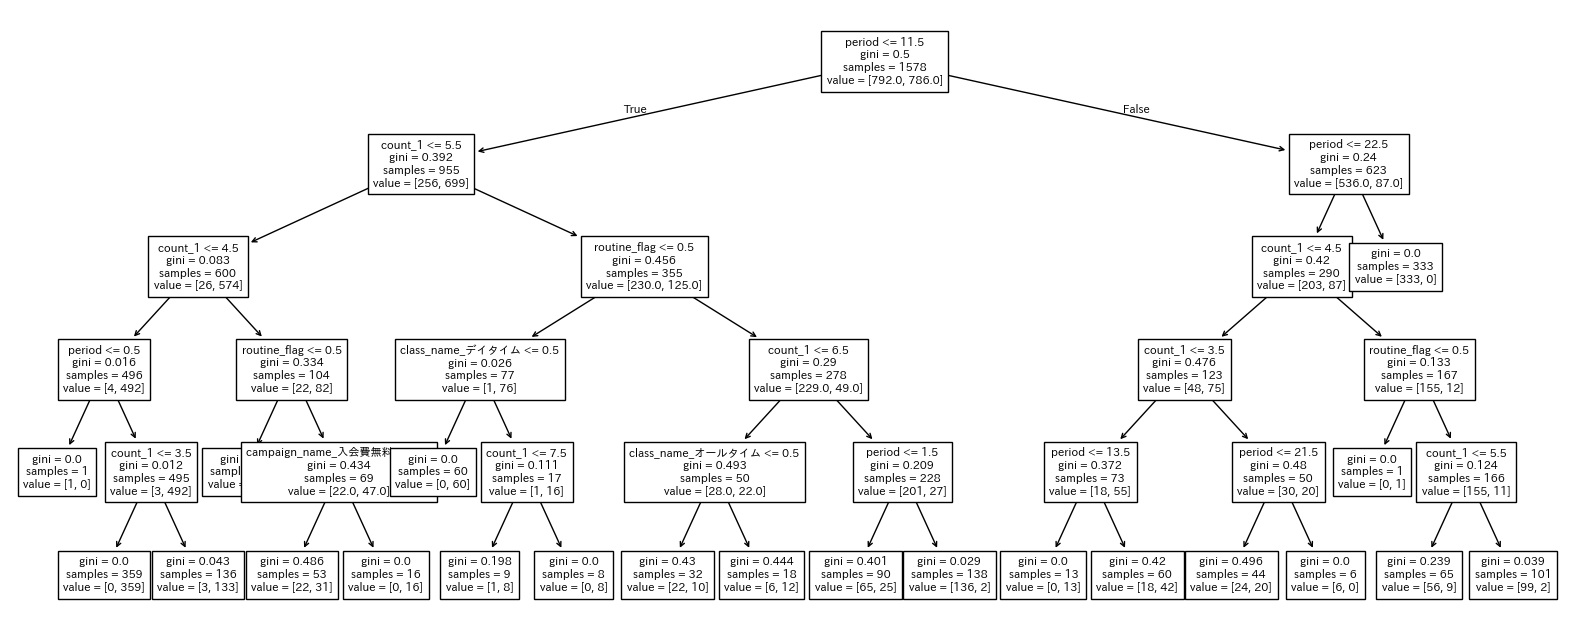

In [94]:
# 木構造上にデータを分類していく
!pip install japanize_matplotlib
from sklearn import tree
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
plt.figure(figsize=(20,8))
tree.plot_tree(model, feature_names=X.columns, fontsize=8)